In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

 # EDA (Exploratory Data Analysis)

In [2]:
sal=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\Salary_Data.csv")
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
sal.info() #here we dont have null values or NA values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Hi\AppData\Local\Temp\ipykernel_12032\1423190555.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['Salary']) #here we can see that Salary data Column is normally distributed without any skewness


<AxesSubplot:xlabel='Salary', ylabel='Density'>

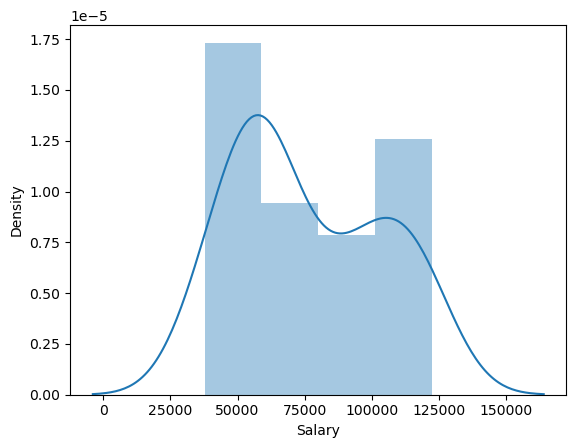

In [4]:
sns.distplot(sal['Salary']) #here we can see that Salary data Column is normally distributed without any skewness


# A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [5]:
print('The skewness of the Salary Data Column is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical. ', sal.Salary.skew())

The skewness of the Salary Data Column is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.  0.35411967922959153


# The pandas library function kurtosis() computes the Fisher's Kurtosis which is obtained by subtracting the Pearson's Kurtosis by three. With Fisher's Kurtosis, definition a normal distribution has a kurtosis of 0

# Kurtosis number should be between 1 and - 1. If it is in this range that mean the data is normally distributed.

In [6]:
print('The Kurtosis of the Salary Data Column is :', sal.Salary.kurtosis())

The Kurtosis of the Salary Data Column is : -1.295421086394517


C:\Users\Hi\AppData\Local\Temp\ipykernel_12032\4093035387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['YearsExperience']) #here we can see that YearsExperience data column is normally distributed and without any skewness


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

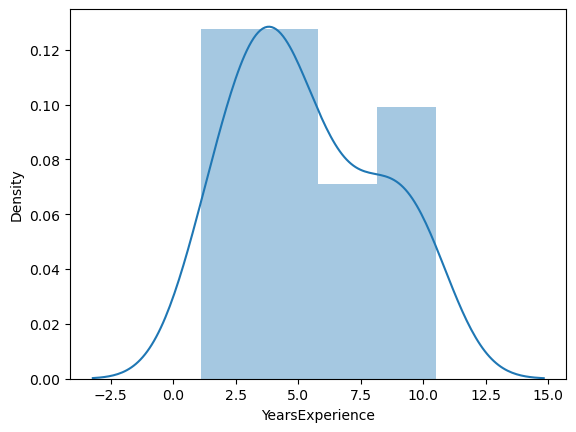

In [7]:
sns.distplot(sal['YearsExperience']) #here we can see that YearsExperience data column is normally distributed and without any skewness

In [8]:
print('The skewness of the YearsExperience Data Column is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical. ', sal.YearsExperience.skew())

The skewness of the YearsExperience Data Column is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.  0.37956024064804106


In [9]:
print('The Kurtosis of the Salary Data Column is :', sal.YearsExperience.kurtosis())

The Kurtosis of the Salary Data Column is : -1.0122119403325072


<AxesSubplot:>

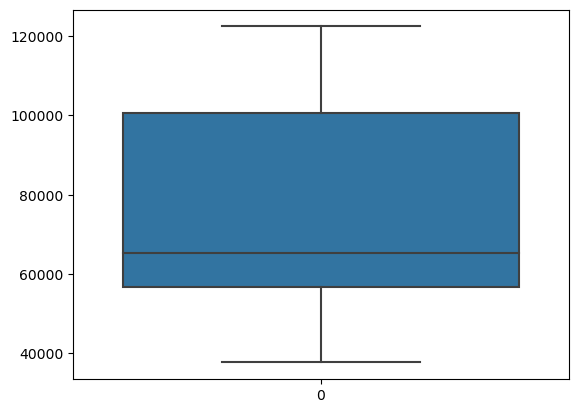

In [10]:
sns.boxplot(sal['Salary']) #here we can see that there are no outliers and the line in the box indicates the mean and most of the data is present at that point

<AxesSubplot:>

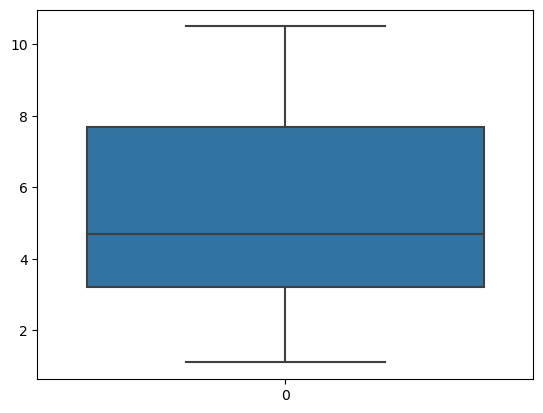

In [11]:
sns.boxplot(sal['YearsExperience'])  #here we can see that there are no outliers and the line in the box indicates the mean and most of the data is present at that point

In [12]:
sal.describe() #description of the whole dataset

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Checking for Correlation

In [13]:
sal.corr() #there is very high correlation between target variable & Independent Variable

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


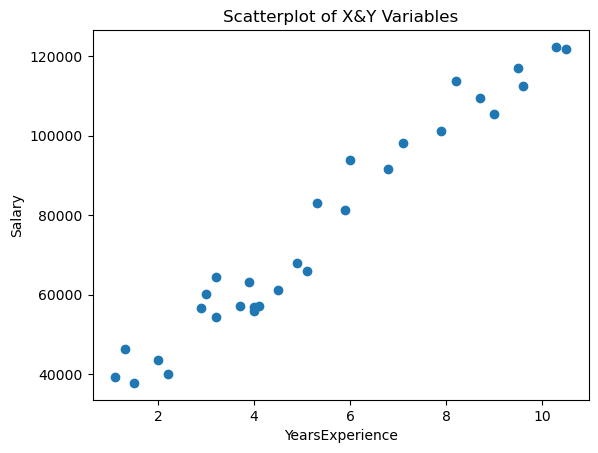

In [14]:
plt.scatter(sal.YearsExperience,sal.Salary) # through this scatterplot we can see there is +ve correlation between the 2 columns
plt.title('Scatterplot of X&Y Variables')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# Feature Scaling

In [15]:
#Normalization of Data , so that algorithm  does not get affected by the Salary column which has huge range of numeric data in 5 digits compared to Years Experience data which is in 2 digits
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
d=scaler.fit_transform(sal)
names=sal.columns
saldf=pd.DataFrame(d,columns=names)
saldf.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


 # Transforming Dataset by applying square root on data columns 

In [16]:

saldf['T_YearsExperience']=np.sqrt(saldf['YearsExperience'])
print('Skewness of Years Expernc column without Feature Scaling---->',sal.YearsExperience.skew())
print('Skewness of Years Expernc column with Feature Scaling And Square root Transformation---->',saldf.T_YearsExperience.skew())
print('Kurtosis of Years Expernc column without Feature Scaling---->',sal.YearsExperience.kurtosis())
print('Kurtosis of Years Expernc column with Feature Scaling And Square root Transformation---->',saldf.T_YearsExperience.kurtosis())
saldf['T_Salary']=np.sqrt(saldf['Salary'])
print('Skewness of Salary column without Feature Scaling---->',sal.Salary.skew())
print('Skewness of Salary column with Feature Scaling And Square root Transformation---->',saldf.T_Salary.skew())
print('Kurtosis of Salary column without Feature Scaling---->',sal.Salary.kurtosis())
print('Kurtosis of Salary column with Feature Scaling And Square root Transformation---->',saldf.T_Salary.kurtosis())

Skewness of Years Expernc column without Feature Scaling----> 0.37956024064804106
Skewness of Years Expernc column with Feature Scaling And Square root Transformation----> -0.46589551648821814
Kurtosis of Years Expernc column without Feature Scaling----> -1.0122119403325072
Kurtosis of Years Expernc column with Feature Scaling And Square root Transformation----> -0.2178604409043401
Skewness of Salary column without Feature Scaling----> 0.35411967922959153
Skewness of Salary column with Feature Scaling And Square root Transformation----> -0.36321059439457953
Kurtosis of Salary column without Feature Scaling----> -1.295421086394517
Kurtosis of Salary column with Feature Scaling And Square root Transformation----> -0.6099285962701315


C:\Users\Hi\AppData\Local\Temp\ipykernel_12032\3331751611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saldf.T_Salary)


<AxesSubplot:xlabel='T_Salary', ylabel='Density'>

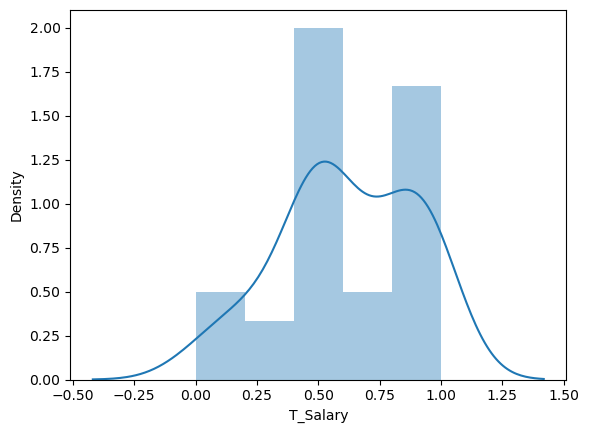

In [17]:
sns.distplot(saldf.T_Salary)

C:\Users\Hi\AppData\Local\Temp\ipykernel_12032\3041252967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saldf.T_YearsExperience) # here we can see through Density plot that there is change in data distribution after tansforming data by square rooting the dataset


<AxesSubplot:xlabel='T_YearsExperience', ylabel='Density'>

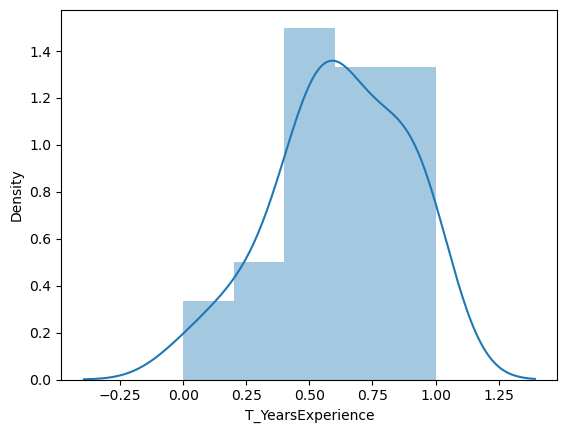

In [18]:
sns.distplot(saldf.T_YearsExperience) # here we can see through Density plot that there is change in data distribution after tansforming data by square rooting the dataset

# Model1 Creation

In [19]:
model=smf.ols("T_Salary~T_YearsExperience",data=saldf).fit()

In [20]:
model.params


Intercept           -0.013585
T_YearsExperience    1.015570
dtype: float64

<AxesSubplot:xlabel='T_YearsExperience', ylabel='T_Salary'>

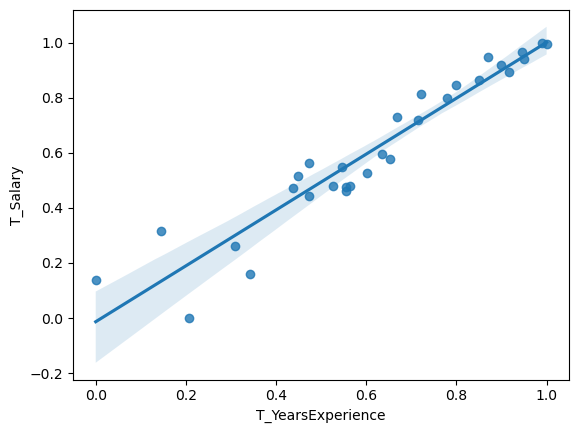

In [21]:
sns.regplot(x="T_YearsExperience",y="T_Salary",data=saldf)

In [22]:
model.tvalues,'/n',model.pvalues #pvalue is <0.05 hence rejecting H0 Hypothesis- (there is no dependency btw the variables)& accepting Ha that there is relationship btw the variables

(Intercept            -0.334480
 T_YearsExperience    16.741112
 dtype: float64,
 '/n',
 Intercept            7.405098e-01
 T_YearsExperience    4.064467e-16
 dtype: float64)

In [23]:
model.rsquared,model.rsquared_adj,model.aic

(0.909169005021548, 0.9059250409151747, -61.14601445430699)

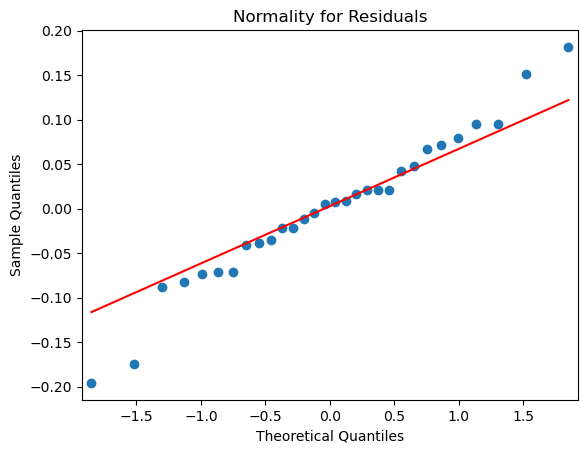

In [24]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

In [25]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

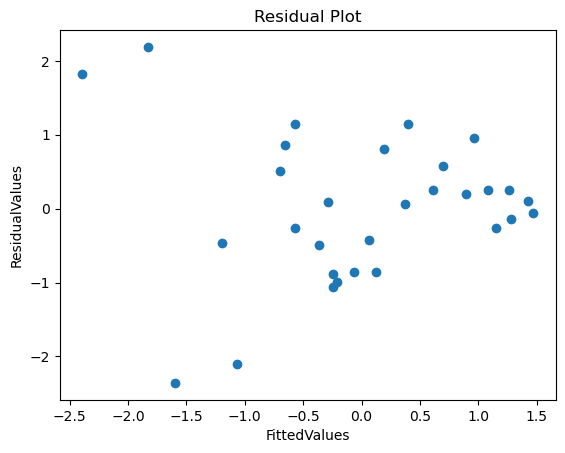

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() #There are no patterns in Residual vs Fitted Values ,hence No problem orelse we have to transform dataset in log or sigmoid or tanh

eval_env: 1


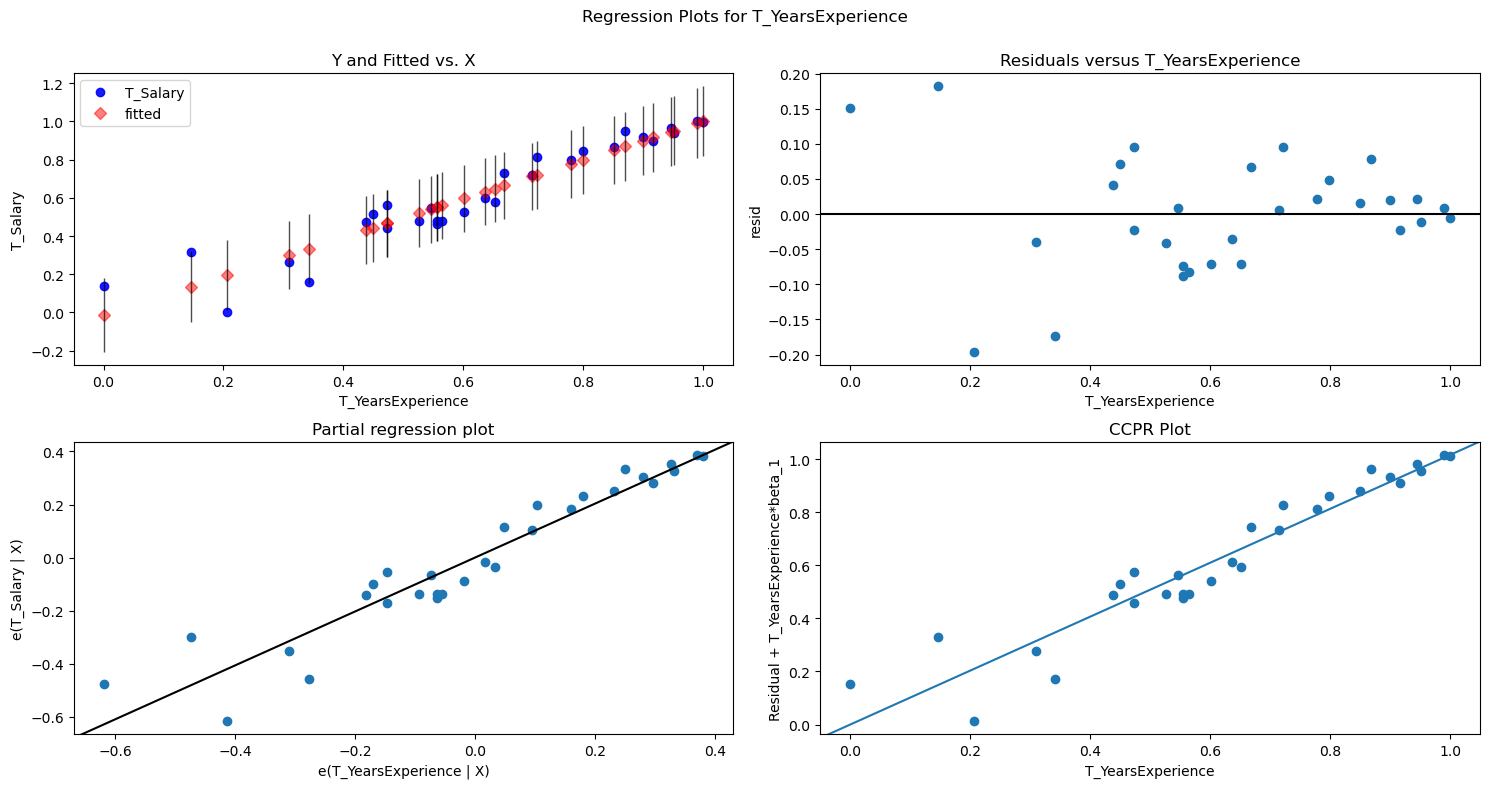

In [27]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"T_YearsExperience",fig=fig)
plt.show()

In [28]:
model_influence=model.get_influence()
(c, _)= model_influence.cooks_distance
summary_cooks=model_influence.summary_frame()
summary_cooks.head()

,dfb_Intercept,dfb_T_YearsExperience,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,1.191071,-1.101646,0.625899,2.043419,0.230646,1.118838,2.175344,1.191071
1,1.059237,-0.937941,0.473995,2.330213,0.148637,0.973648,2.548653,1.064920
2,-1.005122,0.867061,0.420598,-2.471064,0.121082,-0.917167,-2.744131,-1.018520
3,-0.136497,0.110324,0.010483,-0.482163,0.082722,-0.144795,-0.475452,-0.142780
4,-0.603758,0.473894,0.179608,-2.138019,0.072858,-0.599347,-2.295185,-0.643405


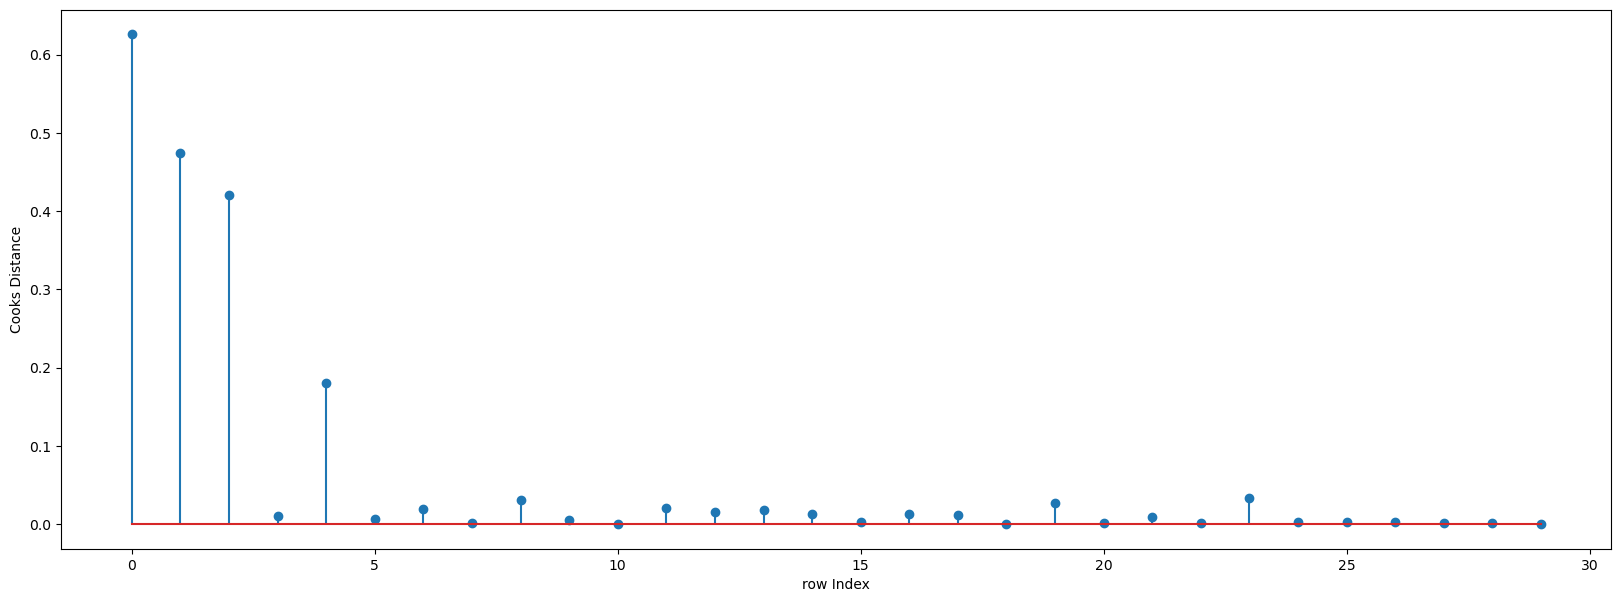

In [29]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(saldf)),np.round(c,3))
plt.xlabel("row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [30]:
(np.argmax(c),np.max(c)) # cooks distance threshold is 4/N so 4/30 = 0.1333 , hence datapoint 23 is indeed influencing point but under the threshold

(0, 0.6258988217853959)

In [31]:
(model.rsquared_adj,model.aic)

(0.9059250409151747, -61.14601445430699)

In [32]:
import math 
from sklearn.metrics import mean_squared_error

In [33]:
mse_m1= mean_squared_error(saldf.T_Salary ,model.fittedvalues) #checking for RMSE value 
rmse_m1=math.sqrt(mse_m1)
print("the difference between actual and predicted values of model1 is :---",rmse_m1)

the difference between actual and predicted values of model1 is :--- 0.08169965982966364


In [34]:
saldf.head()

,YearsExperience,Salary,T_YearsExperience,T_Salary
0,0.000000,0.019041,0.000000,0.137989
1,0.021277,0.100094,0.145865,0.316377
2,0.042553,0.000000,0.206284,0.000000
3,0.095745,0.068438,0.309426,0.261607
4,0.117021,0.025514,0.342084,0.159730


In [35]:
model2=smf.ols("Salary~YearsExperience",data=saldf).fit()

In [36]:
model2.params

Intercept         -0.018236
YearsExperience    1.049252
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

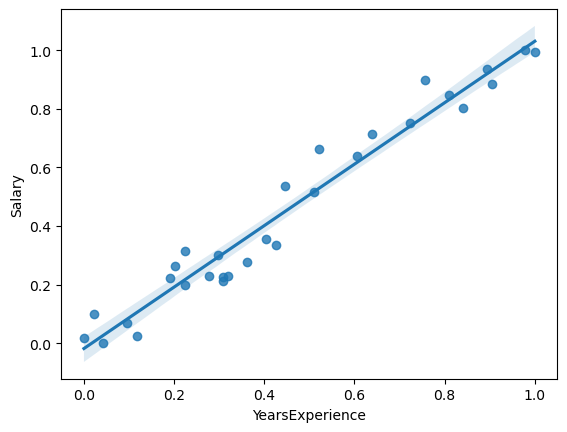

In [37]:
sns.regplot(x="YearsExperience",y="Salary",data=saldf)

In [38]:
model2.tvalues,'/n',model2.pvalues #pvalue is <0.05 hence rejecting H0 Hypothesis- (there is no dependency btw the variables)& accepting Ha that there is relationship btw the variables

(Intercept          -0.806598
 YearsExperience    24.950094
 dtype: float64,
 '/n',
 Intercept          4.266967e-01
 YearsExperience    1.143068e-20
 dtype: float64)

# Model Validation using R-squared , R- squared adjusted, AIC(Akaike Information Criterion)

In [39]:
model2.rsquared,model2.rsquared_adj,model2.aic

(0.9569566641435086, 0.9554194021486339, -73.90159391406291)

# Residual Plot for Homoscedasticity

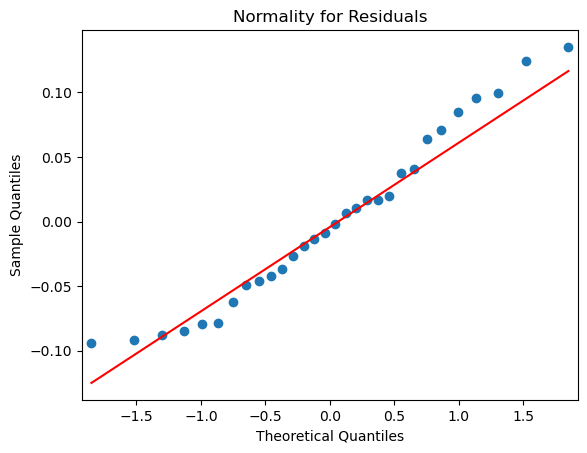

In [40]:
qqplot1=sm.qqplot(model2.resid,line='q')
plt.title("Normality for Residuals")
plt.show()


In [41]:
list(np.where(model2.resid>10))

[array([], dtype=int64)]

# Residual Analysis

In [42]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

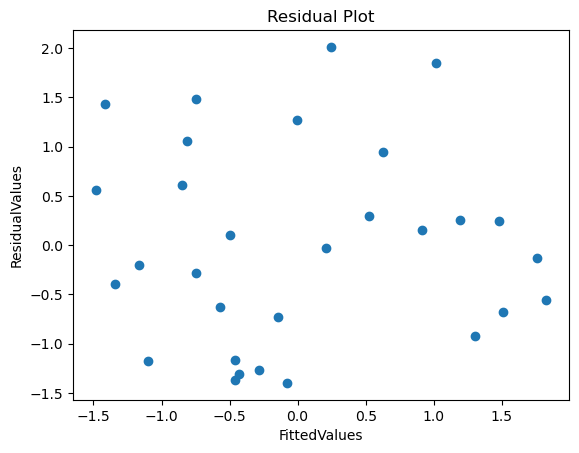

In [43]:
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))
plt.title("Residual Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() #There are no patterns in Residual vs Fitted Values ,hence No problem orelse we have to transform dataset in log or sigmoid or tanh

# Residuals vs Regressors

eval_env: 1


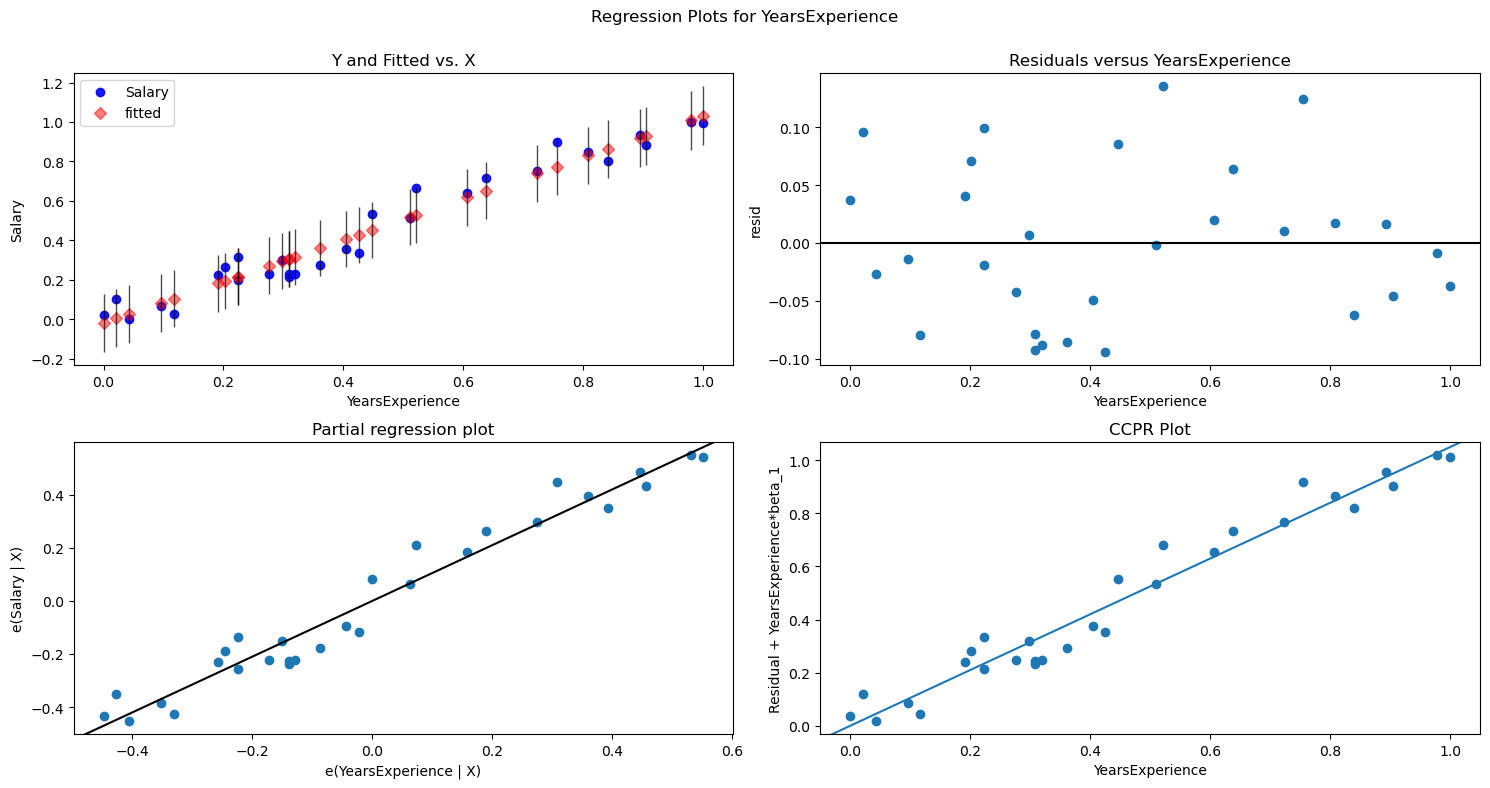

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model2,"YearsExperience",fig=fig)
plt.show()

# Cook's Distance to Detect High Influencing points & Outliers

In [45]:
model_influence=model2.get_influence()
(c2, _)= model_influence.cooks_distance
summary_cooks=model_influence.summary_frame()
summary_cooks.head()

,dfb_Intercept,dfb_YearsExperience,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.199964,-0.166721,0.020486,0.577707,0.109342,0.202416,0.570708,0.199964
1,0.511627,-0.420188,0.125146,1.482031,0.102297,0.500291,1.515999,0.511758
2,-0.129931,0.104974,0.008721,-0.406224,0.095595,-0.132069,-0.400085,-0.130073
3,-0.060669,0.046715,0.001931,-0.210257,0.080338,-0.062144,-0.206632,-0.061072
4,-0.340997,0.256662,0.058415,-1.201813,0.074835,-0.341805,-1.211826,-0.344653


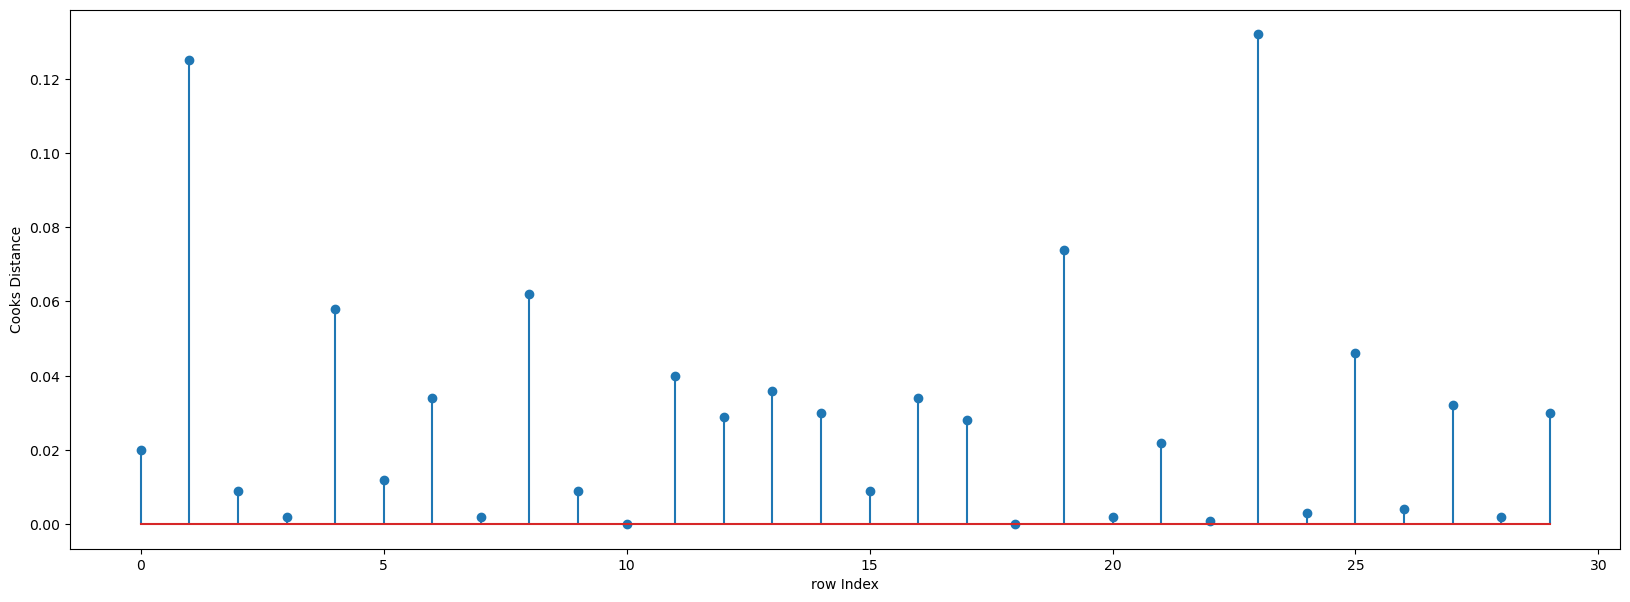

In [46]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(saldf)),np.round(c2,3))
plt.xlabel("row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [47]:
(np.argmax(c2),np.max(c2)) # cooks distance threshold is 4/N so 4/30 = 0.1333 , hence datapoint 23 is indeed influencing point but under the threshold

(23, 0.13175452313135214)

In [48]:
(model2.rsquared_adj,model.rsquared_adj)

(0.9554194021486339, 0.9059250409151747)

### MSE(Mean Squared Error), RMSE(Root Mean Squared Error), MAE(Mean Absolute Error), are the methods used to define loss function(actual-predicted values) , this measures error in our model , so that it give us to what extent the error rate is
### here we are using RMSE which is the standard deviation of the Residuals(prediction errors), Residuals are a measure of how far from the regression line data points are . RMSE tells you how concentrated is the data around the BEST FIT LINE.

In [49]:
mse_m2= mean_squared_error(saldf.Salary,model2.fittedvalues) #checking for RMSE value 
rmse_m2=math.sqrt(mse_m2)
print("the difference between actual and predicted values of model1 is :---",rmse_m2)

the difference between actual and predicted values of model1 is :--- 0.06605296017907701


# Creating Model 3 which is by transforming dataset into log for all datapoints

In [50]:
import numpy as np

a = np.r_[1.] #to handle runtime warning error which was giving divided by zero that will make datapoint infinite
with np.errstate(divide='raise'):
    try:
        a / 0   # this gets caught and handled as an exception
    except FloatingPointError:
        print('oh no!')
a / 0           # this prints a RuntimeWarning as usual

oh no!


C:\Users\Hi\AppData\Local\Temp\ipykernel_12032\2971726837.py:9: RuntimeWarning: divide by zero encountered in true_divide
  a / 0           # this prints a RuntimeWarning as usual


array([inf])

In [51]:
saldf['YearsExperience'].apply(lambda x: float(x))
saldf['Salary'].apply(lambda x: float(x))
np.seterr(divide = 'ignore')
saldf['log_YearsExperience']=np.log1p (saldf['YearsExperience']) #log1p transformation which is going to apply log on (x+1) where x is the datapoint
print('Skewness of Years Expernc column without Feature Scaling---->',sal.YearsExperience.skew())
print('Skewness of Years Expernc column with Feature Scaling And log1p Transformation---->',saldf.log_YearsExperience.skew())
print('Kurtosis of Years Expernc column without Feature Scaling---->',sal.YearsExperience.kurtosis())
print('Kurtosis of Years Expernc column with Feature Scaling And log1p Transformation---->',saldf.log_YearsExperience.kurtosis())
saldf['log_Salary']=np.log1p(saldf['Salary'])
print('Skewness of Salary column without Feature Scaling---->',sal.Salary.skew())
print('Skewness of Salary column with Feature Scaling And Square log1p Transformation---->',saldf.log_Salary.skew())
print('Kurtosis of Salary column without Feature Scaling---->',sal.Salary.kurtosis())
print('Kurtosis of Salary column with Feature Scaling And log1p Transformation---->',saldf.log_Salary.kurtosis())

Skewness of Years Expernc column without Feature Scaling----> 0.37956024064804106
Skewness of Years Expernc column with Feature Scaling And log1p Transformation----> 0.09926933552848294
Kurtosis of Years Expernc column without Feature Scaling----> -1.0122119403325072
Kurtosis of Years Expernc column with Feature Scaling And log1p Transformation----> -1.0505101169950648
Skewness of Salary column without Feature Scaling----> 0.35411967922959153
Skewness of Salary column with Feature Scaling And Square log1p Transformation----> 0.1308195560861916
Kurtosis of Salary column without Feature Scaling----> -1.295421086394517
Kurtosis of Salary column with Feature Scaling And log1p Transformation----> -1.3054866654963644


In [52]:
saldf.head()

,YearsExperience,Salary,T_YearsExperience,T_Salary,log_YearsExperience,log_Salary
0,0.000000,0.019041,0.000000,0.137989,0.000000,0.018862
1,0.021277,0.100094,0.145865,0.316377,0.021053,0.095396
2,0.042553,0.000000,0.206284,0.000000,0.041673,0.000000
3,0.095745,0.068438,0.309426,0.261607,0.091434,0.066198
4,0.117021,0.025514,0.342084,0.159730,0.110666,0.025194


In [53]:
model3=smf.ols("log_Salary~log_YearsExperience",data=saldf).fit()


In [54]:
model3.params


Intercept             -0.015216
log_YearsExperience    1.042493
dtype: float64

<AxesSubplot:xlabel='log_YearsExperience', ylabel='log_Salary'>

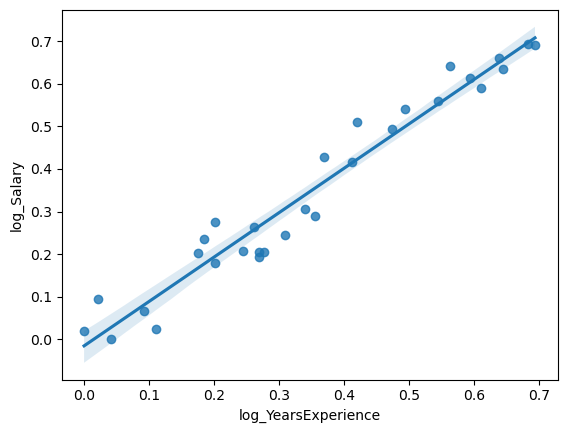

In [55]:
sns.regplot(x="log_YearsExperience",y="log_Salary",data=saldf)


In [56]:
model3.tvalues,'/n',model3.pvalues #pvalue is <0.05 hence rejecting H0 Hypothesis- (there is no dependency btw the variables)& accepting Ha that there is relationship btw the variables


(Intercept              -0.836058
 log_YearsExperience    23.172963
 dtype: float64,
 '/n',
 Intercept              4.102004e-01
 log_YearsExperience    8.249973e-20
 dtype: float64)

In [57]:
model3.rsquared,model3.rsquared_adj,model3.aic

(0.95044126663309, 0.9486713118699861, -92.46599217545443)

# Residual Plot for Homoscedasticity


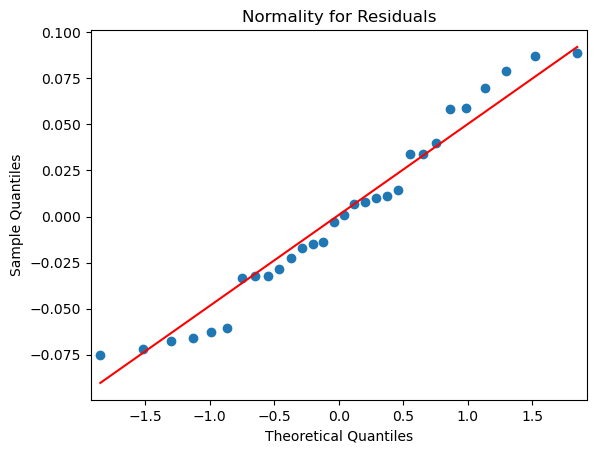

In [58]:
qqplot3=sm.qqplot(model3.resid,line='q')
plt.title("Normality for Residuals")
plt.show()


In [59]:
list(np.where(model3.resid>10))

[array([], dtype=int64)]

# Residual Analysis


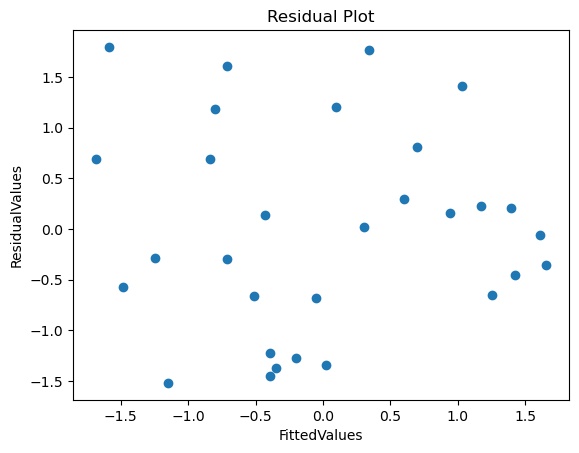

In [60]:
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))
plt.title("Residual Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() #There are no patterns in Residual vs Fitted Values ,hence No problem orelse we have to transform dataset in log or sigmoid or tanh


# Residuals vs Regressors


eval_env: 1


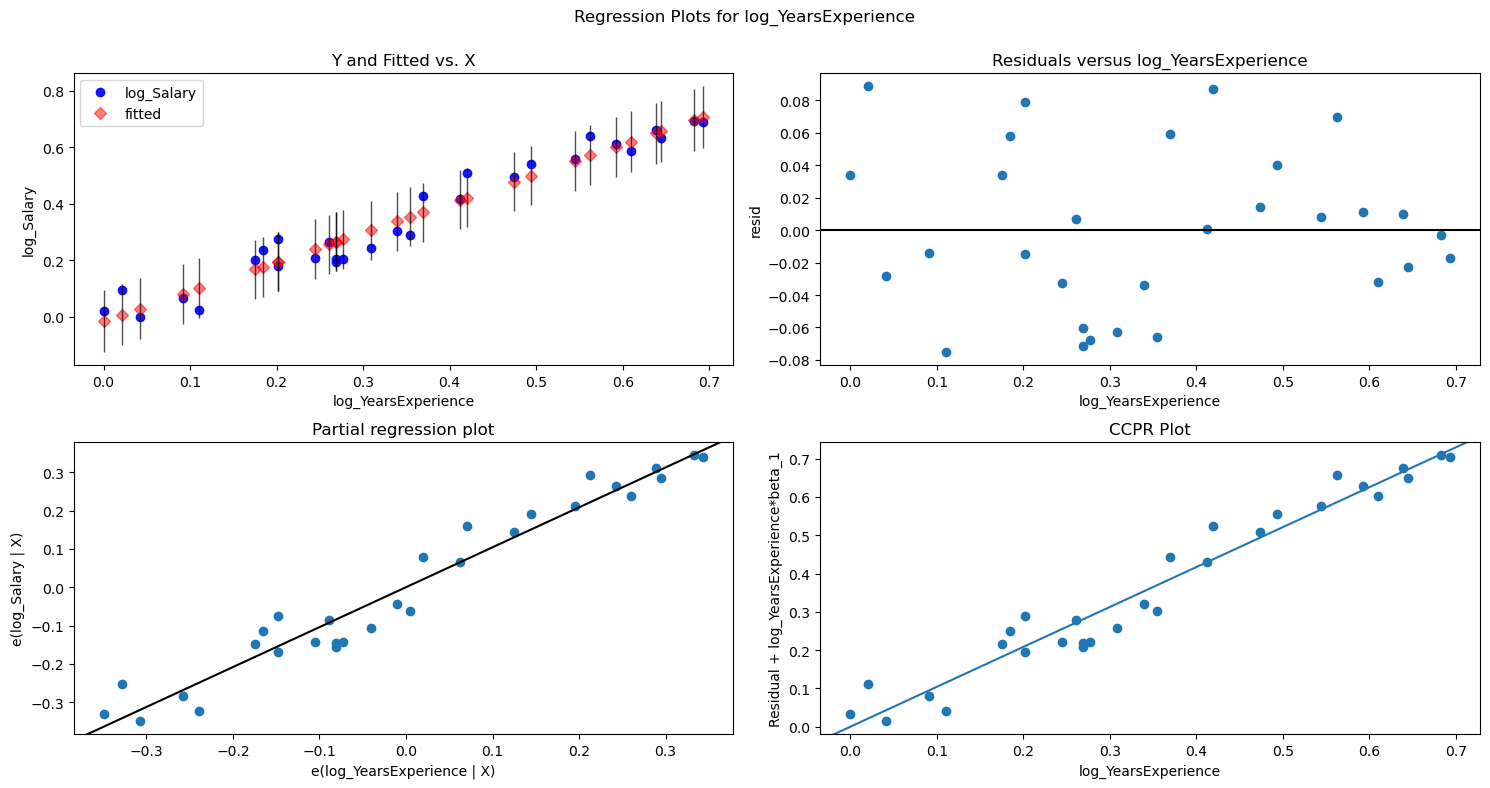

In [61]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model3,"log_YearsExperience",fig=fig)
plt.show()

In [62]:
mse_m3= mean_squared_error(saldf.log_Salary,model3.fittedvalues) #checking for RMSE value 
rmse_m3=math.sqrt(mse_m3)
print("the difference between actual and predicted values of model3 is :---",rmse_m3)


the difference between actual and predicted values of model3 is :--- 0.048475097356859995


# Creating Model 4 which is by transforming dataset into cubic root for all datapoints

In [63]:
saldf['cbrt_YearsExperience']=np.cbrt(saldf['YearsExperience'])
print('Skewness of Years Expernc column without Feature Scaling---->',sal.YearsExperience.skew())
print('Skewness of Years Expernc column with Feature Scaling And Cubic root Transformation---->',saldf.cbrt_YearsExperience.skew())
print('Kurtosis of Years Expernc column without Feature Scaling---->',sal.YearsExperience.kurtosis())
print('Kurtosis of Years Expernc column with Feature Scaling And Cubic root Transformation---->',saldf.cbrt_YearsExperience.kurtosis())
saldf['cbrt_Salary']=np.cbrt(saldf['Salary'])
print('Skewness of Salary column without Feature Scaling---->',sal.Salary.skew())
print('Skewness of Salary column with Feature Scaling And Cubic root Transformation---->',saldf.cbrt_Salary.skew())
print('Kurtosis of Salary column without Feature Scaling---->',sal.Salary.kurtosis())
print('Kurtosis of Salary column with Feature Scaling And Cubic root Transformation---->',saldf.cbrt_Salary.kurtosis())

Skewness of Years Expernc column without Feature Scaling----> 0.37956024064804106
Skewness of Years Expernc column with Feature Scaling And Cubic root Transformation----> -1.1436893355006088
Kurtosis of Years Expernc column without Feature Scaling----> -1.0122119403325072
Kurtosis of Years Expernc column with Feature Scaling And Cubic root Transformation----> 1.803135366522476
Skewness of Salary column without Feature Scaling----> 0.35411967922959153
Skewness of Salary column with Feature Scaling And Cubic root Transformation----> -0.9610781443917876
Kurtosis of Salary column without Feature Scaling----> -1.295421086394517
Kurtosis of Salary column with Feature Scaling And Cubic root Transformation----> 1.011908638022899


In [64]:
model4=smf.ols("cbrt_Salary~cbrt_YearsExperience",data=saldf).fit()


In [65]:
model4.params


Intercept               0.025958
cbrt_YearsExperience    0.955649
dtype: float64

<AxesSubplot:xlabel='cbrt_YearsExperience', ylabel='cbrt_Salary'>

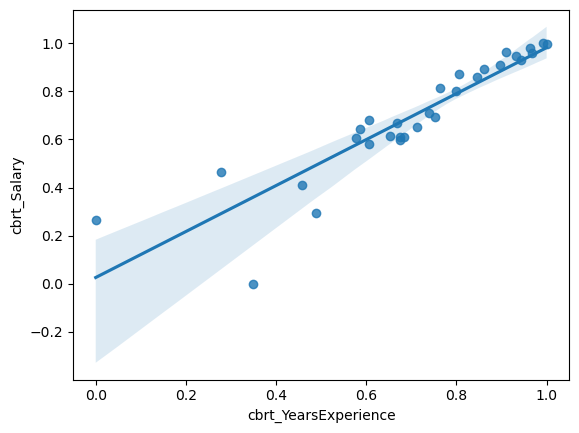

In [66]:
sns.regplot(x="cbrt_YearsExperience",y="cbrt_Salary",data=saldf)


In [67]:
model4.tvalues,'/n',model4.pvalues #pvalue is <0.05 hence rejecting H0 Hypothesis- (there is no dependency btw the variables)& accepting Ha that there is relationship btw the variables


(Intercept                0.410747
 cbrt_YearsExperience    11.215394
 dtype: float64,
 '/n',
 Intercept               6.843843e-01
 cbrt_YearsExperience    7.217252e-12
 dtype: float64)

In [68]:
model4.rsquared,model4.rsquared_adj,model4.aic


(0.8179277095834732, 0.8114251277828829, -47.85702817802206)

# Residual Plot for Homoscedasticity


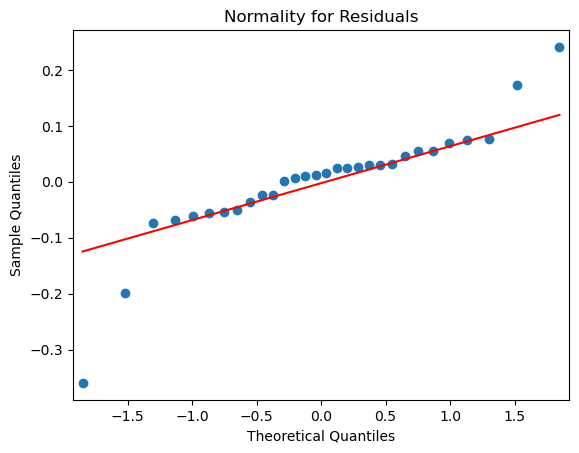

In [69]:
qqplot4=sm.qqplot(model4.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

In [70]:
list(np.where(model4.resid>10))


[array([], dtype=int64)]

# Residual Analysis


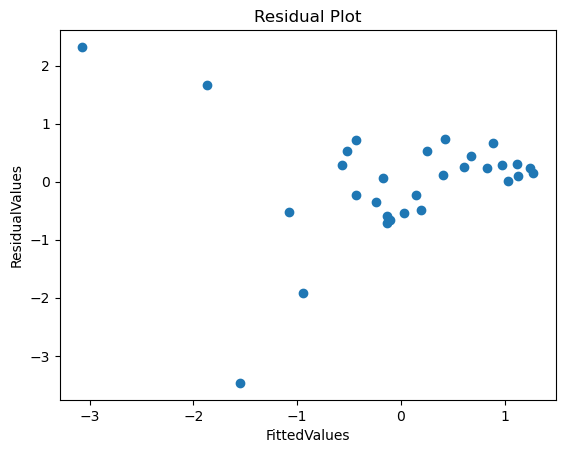

In [71]:
plt.scatter(get_standardized_values(model4.fittedvalues),
            get_standardized_values(model4.resid))
plt.title("Residual Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() #There are no patterns in Residual vs Fitted Values ,hence No problem orelse we have to transform dataset in log or sigmoid or tanh


# Residuals vs Regressors


eval_env: 1


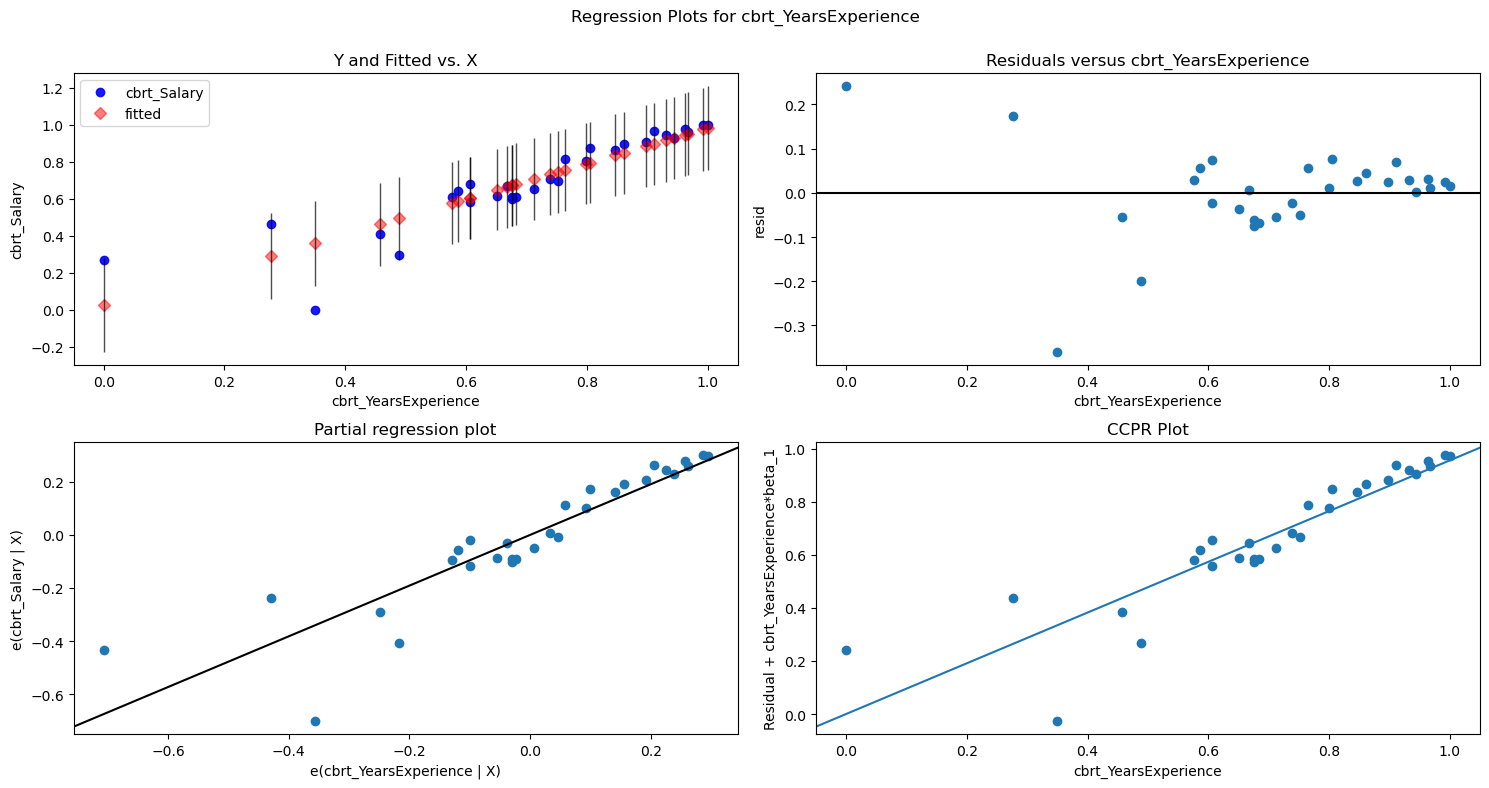

In [72]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model4,"cbrt_YearsExperience",fig=fig)
plt.show()



In [73]:

mse_m4= mean_squared_error(saldf.cbrt_Salary,model4.fittedvalues) #checking for RMSE value 
rmse_m4=math.sqrt(mse_m4)
print("the difference between actual and predicted values of model4 is :---",rmse_m4)


the difference between actual and predicted values of model4 is :--- 0.10195514307800928


In [74]:
print("RMSE-Model1---",rmse_m1,",", "RMSE-Model 2---",rmse_m2,",","RMSE-Model 3---",rmse_m3,',',"RMSE-Model 4---",rmse_m4)

RMSE-Model1--- 0.08169965982966364 , RMSE-Model 2--- 0.06605296017907701 , RMSE-Model 3--- 0.048475097356859995 , RMSE-Model 4--- 0.10195514307800928


In [75]:
print("Model1_Adjusted_Rsquared:",model.rsquared_adj,",","Model2_Adjusted_Rsquared:",model2.rsquared_adj,",","Model3_Adjusted_Rsquared:",model3.rsquared_adj,",","Model4_Adjusted_Rsquared:",model4.rsquared_adj)

Model1_Adjusted_Rsquared: 0.9059250409151747 , Model2_Adjusted_Rsquared: 0.9554194021486339 , Model3_Adjusted_Rsquared: 0.9486713118699861 , Model4_Adjusted_Rsquared: 0.8114251277828829


#### Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.Lower values of RMSE indicate better fit. RMSE value should be Closer to ZERO '0'


# Model3 is ready to predict with 94.8% accuracy as we got r-squared value as 0.948 and RMSE_M3 as 0.048